In [ ]:
!pip install jupyter-autotime -q
!pip install -U aeon -q
!pip install tslearn -q
import gc
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
%load_ext autotime

from google.colab import drive

# Isso solicitará que você autentique sua conta Google para acessar os arquivos do Drive
drive.mount('/content/drive', force_remount=True)

gtex_note = "/content/drive/MyDrive/DATA_GTEx/gtex_annotation.txt"
gtex_age = "/content/drive/MyDrive/DATA_GTEx/gtex_age.txt"
gtex_median = "/content/drive/MyDrive/DATA_GTEx/GTEx_gene_median_tpm.gct"
gtex_tpm = "/content/drive/MyDrive/DATA_GTEx/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct"
gtex_main = "/content/drive/MyDrive/DATA_GTEx/GTEX.txt"
gtex_features = "/content/drive/MyDrive/DATA_GTEx/GTEX_features.txt"
gtex_main_num = "/content/drive/MyDrive/DATA_GTEx/GTEX_main_num.txt"
gen_age_human = "/content/drive/MyDrive/DATA_GTEx/genage_human.csv"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.8/369.8 kB 4.7 MB/s eta 0:00:00


Mounted at /content/drive


In [ ]:
#Gera o dataframe de features e o das series, COM CORTES relativos aos passos
def series(passo_linhas, passo_colunas):

  with open(gtex_features) as features:
      feat = pd.DataFrame([f.strip("\n").split("\t")[1:-1:passo_colunas] for f in features.readlines()])
  with open(gtex_main_num) as gtex:
    gtex_lines = gtex.readlines()[0:-1:passo_linhas]
    frame = []
    for line in gtex_lines:
      frame.append(line.strip("\n").split("\t")[1:-1:passo_colunas])

  return feat, pd.DataFrame(frame[1:], columns = frame[0])

In [ ]:
dic = {}
with open(gtex_main_num, "r") as gtex:
  length = 0
  for line in gtex.readlines():
      try:
        dic[line.split("\t")[1]] = length
        length += len(line)
      except:
        break

In [ ]:
# import pickle
# with open('/content/drive/MyDrive/DATA_GTEx/dict_gen.pickle', 'wb') as handle:
#     pickle.dump(dic, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('/content/drive/MyDrive/DATA_GTEx/dict_gen.pickle', 'rb') as opener:
  dic = pickle.load(opener)

In [ ]:
genes_age = pd.read_csv("/content/drive/MyDrive/DATA_GTEx/genage_human.csv").symbol

In [ ]:
genes_age

0         GHR
1        GHRH
2        SHC1
3      POU1F1
4       PROP1
        ...  
302     TRAP1
303     TRPV1
304    NFE2L1
305     IFNB1
306     GDF11
Name: symbol, Length: 307, dtype: object

In [ ]:
with open(gtex_main_num, "r") as gtex:
  genes_lines = [0]
  for gen in genes_age:
    try:
      genes_lines.append(gtex.seek(dic[gen]))
    except:
      print("not found", gen)
with open(gtex_main_num, "r") as gtex:
  genes = []
  for line in genes_lines:
    gtex.seek(line)
    genes.append(gtex.readline().strip("\n").split("\t"))

In [ ]:
feat = pd.read_table(gtex_features, sep = "\t", header = None)

In [ ]:
genes_senescentes = pd.DataFrame(genes)

In [ ]:
from sympy import divisors
print(divisors(56200),
divisors(17384))

[1, 2, 4, 5, 8, 10, 20, 25, 40, 50, 100, 200, 281, 562, 1124, 1405, 2248, 2810, 5620, 7025, 11240, 14050, 28100, 56200] [1, 2, 4, 8, 41, 53, 82, 106, 164, 212, 328, 424, 2173, 4346, 8692, 17384]


In [ ]:
gc.collect()

0

In [ ]:
genes_sen = genes_senescentes.drop(columns = 0)
genes_sen_cat = (pd.concat([genes_senescentes.drop(columns = 0), feat])
                .drop(columns = 0)
                .rename(columns = genes_senescentes.iloc[0])
                .set_index("Description")
                .drop(index = "Description")
                )

In [ ]:
genes_sen_cat

GTEX-1117F-0226-SM-5GZZ7 GTEX-1117F-0426-SM-5EGHI  \
Description                                                       
GHR                              33.88                    59.93   
GHRH                                 0                        0   
SHC1                             128.1                    19.12   
POU1F1                               0                   0.1799   
PROP1                                0                        0   
...                                ...                      ...   
IFNB1                                0                        0   
GDF11                            3.528                   0.7959   
Interval_Mean                       65                       65   
1=M_2=F                              2                        2   
Categories      Adipose - Subcutaneous        Muscle - Skeletal   

              GTEX-1117F-0526-SM-5EGHJ GTEX-1117F-0626-SM-5N9CS  \
Description                                                       
GHR                              16.99                    18.52   
GHRH                            0.2395                        0   
SHC1                             121.2                    147.2   
POU1F1                               0                        0   
PROP1                                0                        0   
...                                ...                      ...   
IFNB1                                0                        0   
GDF11                            2.277                    6.835   
Interval_Mean                       65                       65   
1=M_2=F                              2                        2   
Categories             Artery - Tibial        Artery - Coronary   

               GTEX-1117F-0726-SM-5GIEN      GTEX-1117F-1326-SM-5EGHH  \
Description                                                             
GHR                               4.079                         38.64   
GHRH                             0.1363                       0.09033   
SHC1                              44.45                         128.5   
POU1F1                                0                       0.06563   
PROP1                                 0                             0   
...                                 ...                           ...   
IFNB1                                 0                             0   
GDF11                             3.156                         4.978   
Interval_Mean                        65                            65   
1=M_2=F                               2                             2   
Categories     Heart - Atrial Appendage  Adipose - Visceral (Omentum)   

              GTEX-1117F-2426-SM-5EGGH GTEX-1117F-2526-SM-5GZY6  \
Description                                                       
GHR                              5.458                    5.443   
GHRH                                 0                  0.08349   
SHC1                             109.5                    73.78   
POU1F1                               0                  0.06066   
PROP1                          0.05464                        0   
...                                ...                      ...   
IFNB1                           0.1863                        0   
GDF11                            11.35                    3.428   
Interval_Mean                       65                       65   
1=M_2=F                              2                        2   
Categories                      Uterus                   Vagina   

              GTEX-1117F-2826-SM-5GZXL             GTEX-1117F-2926-SM-5GZYI  \
Description                                                                   
GHR                              27.18                                5.515   
GHRH                                 0                                    0   
SHC1                             116.8                                55.87   
POU1F1                               0               

In [ ]:
genes_sen_cat.iloc[:-3] = genes_sen_cat.iloc[:-3].astype(float)

In [ ]:
genes_sen_cat.T.Categories.value_counts()

Muscle - Skeletal                            803
Whole Blood                                  755
Skin - Sun Exposed (Lower leg)               701
Adipose - Subcutaneous                       663
Artery - Tibial                              663
Thyroid                                      653
Nerve - Tibial                               619
Skin - Not Sun Exposed (Suprapubic)          604
Lung                                         578
Esophagus - Mucosa                           555
Adipose - Visceral (Omentum)                 541
Esophagus - Muscularis                       515
Cells - Cultured fibroblasts                 504
Breast - Mammary Tissue                      459
Heart - Left Ventricle                       432
Artery - Aorta                               432
Heart - Atrial Appendage                     429
Colon - Transverse                           406
Esophagus - Gastroesophageal Junction        375
Colon - Sigmoid                              373
Testis              

In [ ]:
# GENES = genes_sen_cat.T[genes_sen_cat.T.Categories == "Whole Blood"].sort_values(by = "Interval_Mean")

In [ ]:
GENES = genes_sen_cat.T.sort_values(by = "Interval_Mean")

In [ ]:
GENES.loc[:, ["Interval_Mean"]] = GENES.loc[:, ["Interval_Mean"]].astype(int)

In [ ]:
GENES = GENES.sort_values(by = ["Interval_Mean", "1=M_2=F"])

In [ ]:
GENES.T

GTEX-PW2O-1226-SM-48TCH GTEX-PW2O-0826-SM-48TC5  \
Description                                                     
GHR                             1.993                    1.03   
GHRH                              0.0                     0.0   
SHC1                            30.19                   20.04   
POU1F1                            0.0                  0.1078   
PROP1                             0.0                     0.0   
...                               ...                     ...   
IFNB1                             0.0                     0.0   
GDF11                           2.422                   1.165   
Interval_Mean                      25                      25   
1=M_2=F                             1                       1   
Categories                    Stomach                Pancreas   

              GTEX-PW2O-0526-SM-2I3DX GTEX-PW2O-0426-SM-48TCC  \
Description                                                     
GHR                             5.289                   8.817   
GHRH                              0.0                     0.0   
SHC1                            86.04                   85.56   
POU1F1                         0.3102                  0.2817   
PROP1                             0.0                     0.0   
...                               ...                     ...   
IFNB1                          0.4121                     0.0   
GDF11                           5.605                   7.525   
Interval_Mean                      25                      25   
1=M_2=F                             1                       1   
Categories                       Lung          Artery - Aorta   

              GTEX-PW2O-0226-SM-48TC7 GTEX-PW2O-0126-SM-48TC8  \
Description                                                     
GHR                             4.939                   1.933   
GHRH                           0.3284                     0.0   
SHC1                            56.07                   47.75   
POU1F1                         0.2148                  0.2588   
PROP1                             0.0                     0.0   
...                               ...                     ...   
IFNB1                             0.0                     0.0   
GDF11                            2.24                   3.315   
Interval_Mean                      25                      25   
1=M_2=F                             1                       1   
Categories              Adrenal Gland                  Spleen   

                    GTEX-PW2O-0008-SM-48TEB GTEX-PW2O-0006-SM-2I3DV  \
Description                                                           
GHR                                   14.56                     0.0   
GHRH                                    0.0                     0.0   
SHC1                                  325.4                   9.066   
POU1F1                              0.06463                     0.0   
PROP1                                   0.0                 0.02508   
...                                     ...                     ...   
IFNB1                                 0.118                     0.0   
GDF11                                 8.928                  0.6567   
Interval_Mean                            25                      25   
1=M_2=F                                   1                       1   
Categories     Cells - Cultured fibroblasts             Whole Blood   

              GTEX-PW2O-1426-SM-48TCD GTEX-1JKYR-0005-SM-DHXL5  ...  \
Description                                                     ...   
GHR                             1.585                 0.007672  ...   
GHRH                            0.342                      0.0  ...   
SHC1                            18.38                    16.86  ...   
POU1F1                            0.0                      0.0  ...   
PROP1                             0.0                      0.0  ...   
...                               ...                  

In [ ]:
tecidos = list(GENES.Categories.unique())

In [ ]:
select = GENES[GENES.Categories.isin(tecidos[:5])]

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
SS = StandardScaler().set_output(transform="pandas")
MMS = MinMaxScaler().set_output(transform="pandas")

In [ ]:
ss_wb = SS.fit_transform(select.T.iloc[:-3].T)
ss_mms_wb = MMS.fit_transform(ss_wb).T

In [ ]:
ss_mms_wb.iloc[0]

GTEX-PW2O-1226-SM-48TCH     0.032628
GTEX-PW2O-0826-SM-48TC5     0.015391
GTEX-PW2O-0526-SM-2I3DX     0.091622
GTEX-PW2O-0426-SM-48TCC     0.154768
GTEX-PW2O-0226-SM-48TC7     0.085357
                              ...   
GTEX-14PK6-0126-SM-664O1    0.072542
GTEX-14PK6-0326-SM-6AJ9S    0.127240
GTEX-14PK6-0626-SM-6AJ9P    0.098674
GTEX-15UF6-1826-SM-6LLI9    0.007843
GTEX-15UF6-0226-SM-7KUF6    0.154267
Name: GHR, Length: 1955, dtype: float64

In [ ]:
from sklearn.cluster import SpectralClustering
clustering = (SpectralClustering(n_clusters=6,
              assign_labels='discretize',
              random_state=42).fit(ss_mms_wb))

In [ ]:
from tslearn.clustering import TimeSeriesKMeans
import numpy as np
import matplotlib.pyplot as plt

values = ss_mms_wb
n_clusters = 10

# KMeans para séries temporais
kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True, random_state=0)
kmeans.fit(values)
labels = kmeans.labels_

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.5s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   29.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   29.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   19.4s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   31.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.8s
[Parallel(n_jobs=1)]: Do

12.540 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   29.7s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:   46.3s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:  1.5min


9.789 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.4s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   29.9s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:   46.7s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:  1.5min


9.725 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.9s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   29.0s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:   45.3s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:  1.5min


9.700 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.7s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   29.2s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:   45.5s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:  1.5min


9.685 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.8s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   29.7s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:   46.5s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:  1.5min


9.672 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.6s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   29.7s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:   46.4s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:  1.5min


9.657 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.8s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   16.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   29.1s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:   45.4s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:  1.5min


9.657 --> 


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   17.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   29.7s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:   46.5s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:  1.5min


In [ ]:
ss_mms_wb["labels"] = labels

In [ ]:
ss_mms_wb.labels.value_counts()

69    17
7     15
22    14
8     13
65    12
      ..
55     1
13     1
62     1
33     1
89     1
Name: labels, Length: 100, dtype: int64

In [ ]:
print("\n".join(ss_mms_wb[ss_mms_wb.labels == 3].index))

TFDP1


<ipython-input-44-c25d4bf05321>:8: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


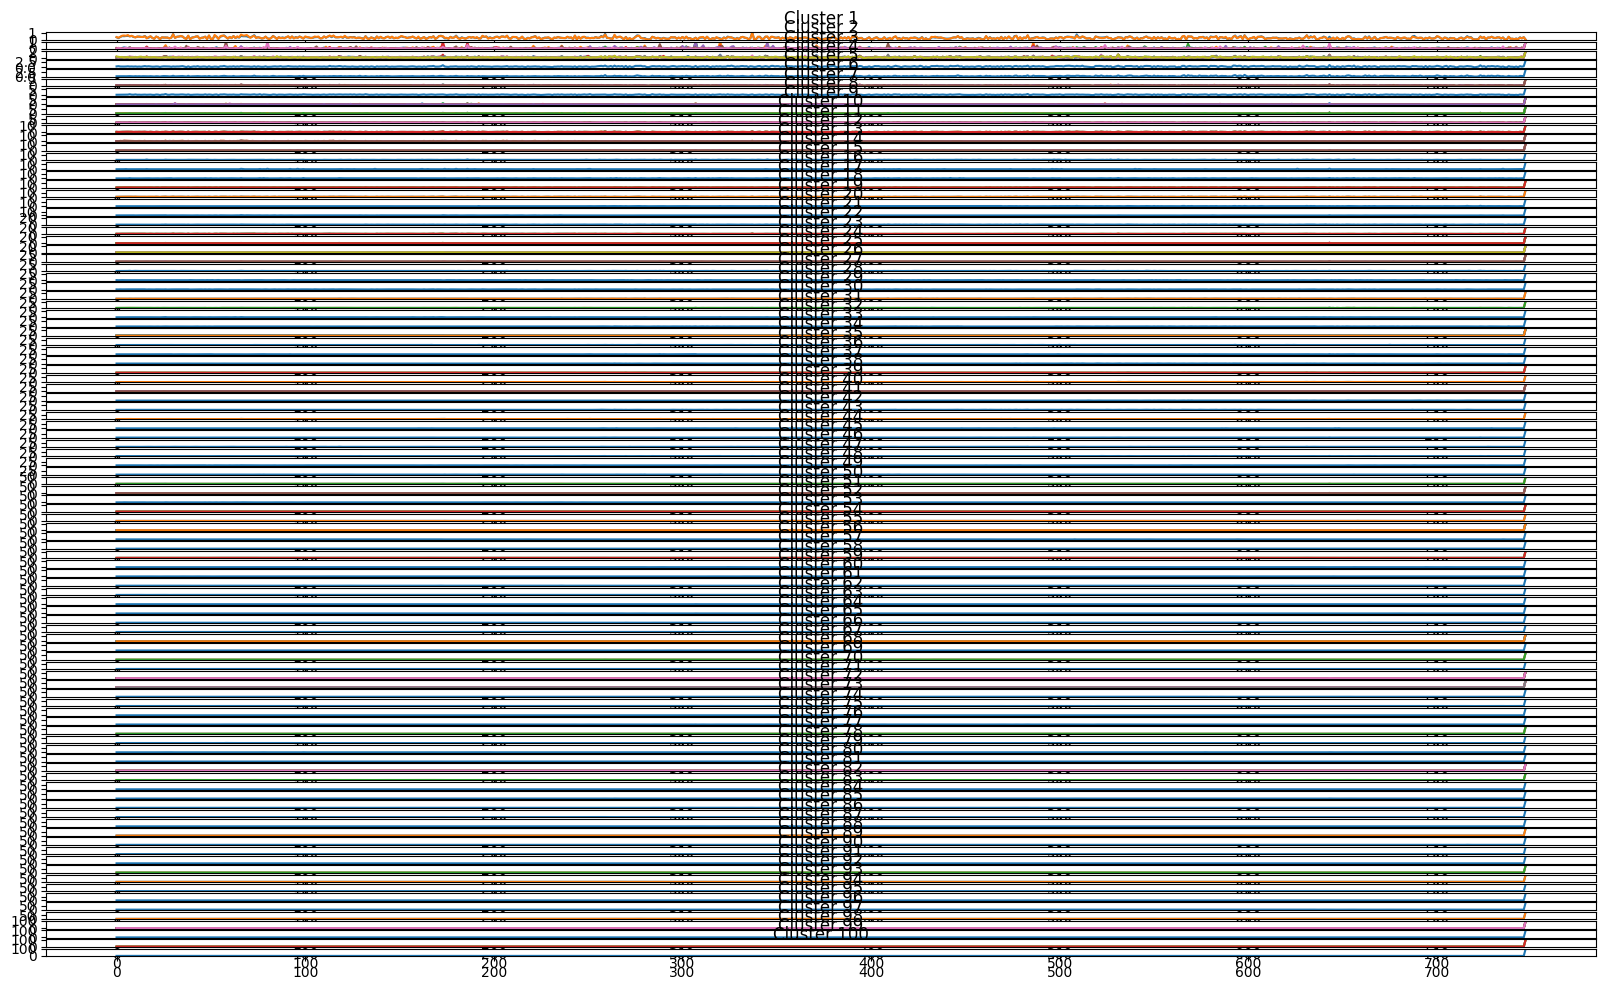

In [ ]:
plt.figure(figsize=(20, 12))
for cluster_idx in range(n_clusters):
    plt.subplot(n_clusters, 1, cluster_idx + 1)
    for series_idx, label in enumerate(labels):
        if label == cluster_idx:
            plt.plot(values.to_numpy()[series_idx].ravel())
    plt.title(f'Cluster {cluster_idx + 1}')
plt.tight_layout()
plt.show()

In [ ]:
labels = np.concatenate((labels, [-1, -1, -1]))

In [ ]:
results = brain_select.T

In [ ]:
results["labels"] = labels

In [ ]:
results.labels.value_counts()

69    17
7     15
22    14
8     13
65    12
      ..
62     1
33     1
99     1
30     1
78     1
Name: labels, Length: 101, dtype: int64

In [ ]:
print("\n".join(results[results.labels == 7].index))

SHC1
PLAU
IGF2
NGFR
IL2
IGFBP3
APOC3
FOXM1
CACNA1A
TFAP2A
BDNF
LEPR
POLB
FGF23
SLC13A1


In [ ]:
data_blood["spectral_clustering"].value_counts()

In [ ]:
for i in pd.Series(clust_labels).unique():
  with open(f"/content/drive/MyDrive/DATA_GTEx/GENES_SPECTRAL_{i}.txt", "w") as saida:
    saida.write("\n".join(data_blood[data_blood['spectral_clustering'] == i].index))

In [ ]:
la = list(labels)

data_blood["labels"] = la

In [ ]:
pd.Series(labels).value_counts()

2    63
4    57
1    51
9    37
5    29
7    18
8    16
6    13
0    12
3    11
dtype: int64

In [ ]:
pd.Series(labels).value_counts()

1    68
4    53
9    32
5    30
8    30
7    29
6    21
3    21
2    14
0     9
dtype: int64

<Axes: >

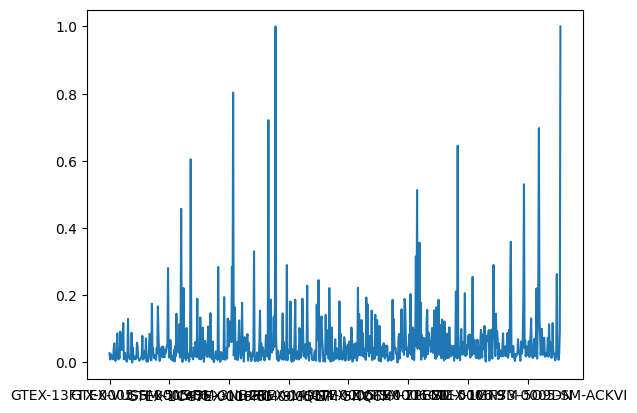

In [ ]:
data_blood[data_blood['labels'] == 1].iloc[3].plot()

<Axes: >

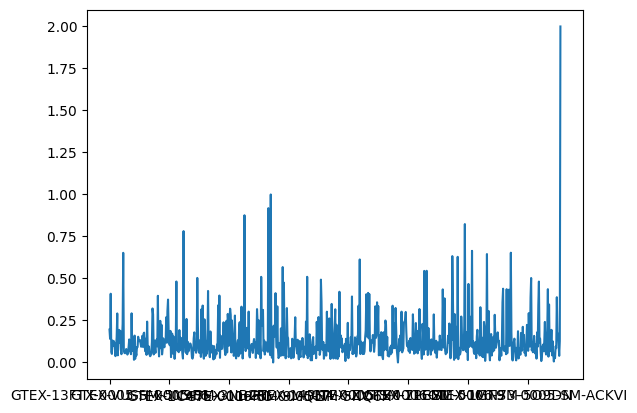

In [ ]:
data_blood[data_blood['labels'] == 2].iloc[58].plot()

In [ ]:
for i in pd.Series(labels).unique():
  with open(f"/content/drive/MyDrive/DATA_GTEx/GENES_CLUSTERS_{i}.txt", "w") as saida:
    saida.write("\n".join(data_blood[data_blood['labels'] == i].index))

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
SS1 = StandardScaler().set_output(transform="pandas")
MMS1 = MinMaxScaler().set_output(transform="pandas")

In [ ]:
gen_t = genes_sen_cat.T

In [ ]:
agrupar = pd.concat([gen_t[gen_t.Categories == 'Artery - Coronary'].iloc[:25], gen_t[gen_t.Categories == 'Brain - Frontal Cortex (BA9)'].iloc[:25], gen_t[gen_t.Categories == 'Stomach'].iloc[:25]])

In [ ]:
ss1_ag = SS1.fit_transform(agrupar.loc[:, agrupar.columns[:-3]])
ss1_mms1_ag = MMS1.fit_transform(ss1_ag)

In [ ]:
ss1_mms1_ag

GHR      GHRH      SHC1    POU1F1     PROP1  \
GTEX-1117F-0626-SM-5N9CS  0.340579  0.000000  0.589325  0.000000  0.000000   
GTEX-1122O-0426-SM-5H12G  0.132562  0.000000  0.333630  0.904913  0.000000   
GTEX-117YX-1726-SM-5GZZS  0.369242  0.000000  0.400591  0.000000  0.000000   
GTEX-11DXX-0826-SM-5GZZP  0.097699  0.000000  0.488022  0.385895  0.000000   
GTEX-11DXY-1126-SM-5987W  0.057010  0.096161  0.372260  0.160539  0.000000   
...                            ...       ...       ...       ...       ...   
GTEX-12BJ1-1726-SM-5HL9B  0.031382  0.000000  0.282222  0.131511  0.000000   
GTEX-12C56-0526-SM-5FQST  0.224057  0.093805  0.451452  0.469889  0.000000   
GTEX-12WSD-2326-SM-59HKQ  0.111562  0.000000  0.142837  0.000000  0.000000   
GTEX-12WSG-2026-SM-5FQUU  0.020142  0.000000  0.076002  0.000000  0.727456   
GTEX-12WSJ-0926-SM-5P9JD  0.112424  0.000000  1.000000  0.000000  0.000000   

                              TP53  TERC      TERT       ATM      PLAU  ...  \
GTEX-1117F-0626-SM-5N9CS  0.744979   0.0  0.018461  0.755636  0.063197  ...   
GTEX-1122O-0426-SM-5H12G  0.439122   0.0  0.000000  0.324709  0.034212  ...   
GTEX-117YX-1726-SM-5GZZS  0.533253   0.0  0.052020  0.869874  0.062883  ...   
GTEX-11DXX-0826-SM-5GZZP  0.648055   0.0  0.000000  0.494326  0.098312  ...   
GTEX-11DXY-1126-SM-5987W  0.541074   0.0  0.000000  0.425178  0.183359  ...   
...                            ...   ...       ...       ...       ...  ...   
GTEX-12BJ1-1726-SM-5HL9B  0.366777   0.0  0.554334  0.216296  0.028981  ...   
GTEX-12C56-0526-SM-5FQST  0.390240   0.0  0.000000  0.315555  0.024715  ...   
GTEX-12WSD-2326-SM-59HKQ  0.153990   0.0  0.022923  0.176653  0.089398  ...   
GTEX-12WSG-2026-SM-5FQUU  0.248345   0.0  1.000000  0.211000  0.020624  ...   
GTEX-12WSJ-0926-SM-5P9JD  0.596101   0.0  0.000000  0.247314  0.057494  ...   

                               GRN  SERPINE1     SPRTN    RICTOR      CTF1  \
GTEX-1117F-0626-SM-5N9CS  0.196036  0.084929  0.380502  0.398054  0.521519   
GTEX-1122O-0426-SM-5H12G  0.219305  0.983048  0.460760  0.430405  0.589690   
GTEX-117YX-1726-SM-5GZZS  0.697773  0.415861  0.330036  0.215879  0.289996   
GTEX-11DXX-0826-SM-5GZZP  0.209529  0.216272  0.362494  0.226751  0.333213   
GTEX-11DXY-1126-SM-5987W  0.187499  0.235735  0.176189  0.280316  0.864173   
...                            ...       ...       ...       ...       ...   
GTEX-12BJ1-1726-SM-5HL9B  0.224400  0.013079  0.289129  0.107608  0.136316   
GTEX-12C56-0526-SM-5FQST  0.211044  0.071430  0.261672  0.222773  0.563965   
GTEX-12WSD-2326-SM-59HKQ  0.092714  0.025310  0.065029  0.233911  0.128315   
GTEX-12WSG-2026-SM-5FQUU  0.092673  0.001396  0.066807  0.077431  0.114347   
GTEX-12WSJ-0926-SM-5P9JD  0.229356  0.057166  0.266785  0.088303  0.473671   

                             TRAP1     TRPV1    NFE2L1  IFNB1     GDF11  
GTEX-1117F-0626-SM-5N9CS  0.724982  0.417769  0.796873    0.0  0.328445  
GTEX-1122O-0426-SM-5H12G  0.265419  0.079292  0.713912    0.0  0.112125  
GTEX-117YX-1726-SM-5GZZS  0.479242  0.381337  0.812962    0.0  0.214936  
GTEX-11DXX-0826-SM-5GZZP  0.591793  0.139715  0.715923    0.0  0.314379  
GTEX-11DXY-1126-SM-5987W  0.541877  0.114899  0.440394    0.0  0.148459  
...                            ...       ...       ...    ...       ...  
GTEX-12BJ1-1726-SM-5HL9B  0.378930  0.172607  0.138318    0.0  0.058737  
GTEX-12C56-0526-SM-5FQST  0.356611  0.136209  0.603801    0.0  0.146884  
GTEX-12WSD-2326-SM-59HKQ  0.274778  0.095721  0.124943    0.0  0.064820  
GTEX-12WSG-2026-SM-5FQUU  0.296136  0.147929  0.069737    0.0  0.053306  
GTEX-12WSJ-0926-SM-5P9JD  0.471322  0.065028  0.474081    0.0  0.295261  

[75 rows x 307 columns]

In [ ]:
from sklearn.model_selection import train_test_split
xtreino, xteste, ytreino, yteste = train_test_split(ss1_mms1_ag, agrupar.loc[:, agrupar.columns[-3:]], test_size = 0.3)

In [ ]:
from sklearn.cluster import SpectralClustering
clustering = (SpectralClustering(n_clusters=3,
              assign_labels='discretize',
              random_state=42).fit(xtreino))

In [ ]:
clustering.labels_

array([0, 1, 1, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2,
       1, 0, 1, 2, 1, 1, 2, 2, 1, 2, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       0, 2, 1, 2, 1, 0, 1, 2])

In [ ]:
ytreino["spectral_clustering"] = clustering.labels_

In [ ]:
ytreino

Description                   Interval_Mean 1=M_2=F  \
GTEX-11I78-1726-SM-5A5M3                 55       2   
GTEX-11VI4-0326-SM-5EQ6L                 45       2   
GTEX-11EM3-0526-SM-5H12N                 25       2   
GTEX-12WSE-0011-R10b-SM-5P9JV            25       1   
GTEX-11NUK-2426-SM-5BC4U                 55       1   
GTEX-12WSJ-0926-SM-5P9JD                 45       2   
GTEX-12C56-0526-SM-5FQST                 25       1   
GTEX-11H98-0011-R10b-SM-5NQ98            55       1   
GTEX-12WSM-0011-R10a-SM-5DUWV            65       1   
GTEX-11TUW-0011-R10a-SM-DO924            65       1   
GTEX-12WSD-2326-SM-59HKQ                 65       2   
GTEX-12WSG-2026-SM-5FQUU                 55       2   
GTEX-12WSF-0011-R10a-SM-5LZVH            75       1   
GTEX-11WQK-2626-SM-5EQ4K                 55       1   
GTEX-11P7K-1726-SM-5GU6F                 35       1   
GTEX-11ZUS-0526-SM-59884                 35       1   
GTEX-11EQ9-1226-SM-5987E                 35       1   
GTEX-11GSP-2126-SM-5HL5E                 65       2   
GTEX-117YW-2226-SM-5N9DB                 55       1   
GTEX-11EMC-0011-R10a-SM-DNZZJ            65       2   
GTEX-11WQC-0011-R10a-SM-57WCT            65       1   
GTEX-12WSA-0011-R10b-SM-5P9ET            65       1   
GTEX-11P82-0726-SM-5PNYL                 25       1   
GTEX-111YS-1126-SM-5GZYQ                 65       1   
GTEX-11ONC-1126-SM-5GU6G                 65       1   
GTEX-1192X-0011-R10a-SM-DO941            55       1   
GTEX-1211K-1426-SM-5FQTF                 65       2   
GTEX-1122O-0426-SM-5H12G                 65       2   
GTEX-11DXY-0011-R10b-SM-DO12C            65       1   
GTEX-11GSP-0011-R10a-SM-5NQ7J            65       2   
GTEX-12WSK-0726-SM-5LZUV                 45       2   
GTEX-12ZZY-0011-R10b-SM-5HL7W            65       1   
GTEX-12BJ1-1726-SM-5HL9B                 65       1   
GTEX-11DXX-1326-SM-5GIDZ                 65       2   
GTEX-12ZZW-0011-R10b-SM-5HL9X            55       1   
GTEX-12WSE-1126-SM-7DUEH                 25       1   
GTEX-12ZZX-0626-SM-5EQ46                 45       2   
GTEX-131XF-0526-SM-5HL87                 65       1   
GTEX-11DXZ-0526-SM-5GU7J                 55       1   
GTEX-117YX-1026-SM-5H11V                 55       1   
GTEX-12WSL-0926-SM-5N9EK                 55       1   
GTEX-11GS4-0626-SM-5A5LC                 65       1   
GTEX-11DYG-0926-SM-5EGGW                 65       1   
GTEX-12WSC-0011-R10a-SM-5GU57            55       1   
GTEX-11NSD-1426-SM-5HL67                 25       1   
GTEX-11ZTS-0011-R10a-SM-DO93S            65       2   
GTEX-11I78-1026-SM-5HL74                 55       2   
GTEX-11PRG-0011-R10b-SM-DO93G            55       1   
GTEX-1117F-0626-SM-5N9CS                 65       2   
GTEX-11EI6-2426-SM-5PNVS                 65       1   
GTEX-12WSD-1026-SM-5EQ42                 65       2   
GTEX-11TTK-0011-R10b-SM-DO925            65       2   

Description                                      Categories  \
GTEX-11I78-1726-SM-5A5M3                            Stomach   
GTEX-11VI4-0326-SM-5EQ6L                            Stomach   
GTEX-11EM3-0526-SM-5H12N                  Artery - Coronary   
GTEX-12WSE-0011-R10b-SM-5P9JV  Brain - Frontal Cortex (BA9)   
GTEX-11NUK-2426-SM-5BC4U                            Stomach   
GTEX-12WSJ-0926-SM-5P9JD                            Stomach   
GTEX-12C56-0526-SM-5FQST                            Stomach   
GTEX-11H98-0011-R10b-SM-5NQ98  Brain - Frontal Cortex (BA9)   
GTEX-12WSM-0011-R10a-SM-5DUWV  Brain - Frontal Cortex (BA9)   
GTEX-11TUW-0011-R10a-SM-DO924  Brain - Frontal Cortex (BA9)   
GTEX-12WSD-2326-SM-59HKQ                            Stomach   
GTEX-12WSG-2026-SM-5FQUU                            Stomach   
GTEX-12WSF-0011-R10a-SM-5LZVH  Brain - Frontal Cortex (BA9)   
GTEX-11WQK-2626-SM-5EQ4K                            Stomach   
GTEX-11P7K-1726-SM-5GU6F                            Stomach   
GTEX-11ZUS-0526-SM-59884                  Artery - Coronary   
GTEX-11EQ9-12

In [ ]:
from tslearn.clustering import TimeSeriesKMeans
import numpy as np

values_treino = xtreino
n_clusters = 3

# KMeans para séries temporais
dtw_kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=8)
dtw_kmeans.fit(values_treino)
dtw_labels = dtw_kmeans.labels_

In [ ]:
ytreino["DTW"] = dtw_labels

In [ ]:
from tslearn.clustering import TimeSeriesKMeans
import numpy as np

values_treino = xtreino
n_clusters = 3

# KMeans para séries temporais
dtw_kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", verbose=True, random_state=0)
dtw_kmeans.fit(values_treino)
dtw_labels = dtw_kmeans.labels_

13.450 --> 7.609 --> 7.609 --> 


In [ ]:
ytreino["Euclidean"] = dtw_labels

In [ ]:
ytreino.Categories.unique()

array(['Stomach', 'Artery - Coronary', 'Brain - Frontal Cortex (BA9)'],
      dtype=object)

In [ ]:
ytreino.Categories.value_counts()

Stomach                         20
Brain - Frontal Cortex (BA9)    17
Artery - Coronary               15
Name: Categories, dtype: int64

In [ ]:
ytreino[ytreino.Categories == "Stomach"].spectral_clustering.value_counts()

0    12
1     8
Name: spectral_clustering, dtype: int64

In [ ]:
ytreino[ytreino.Categories == "Artery - Coronary"].spectral_clustering.value_counts()

1    15
Name: spectral_clustering, dtype: int64

In [ ]:
ytreino[ytreino.Categories == 'Brain - Frontal Cortex (BA9)'].spectral_clustering.value_counts()

2    17
Name: spectral_clustering, dtype: int64

In [ ]:
ytreino[ytreino.Categories == "Stomach"].DTW.value_counts()

1    16
2     3
0     1
Name: DTW, dtype: int64

In [ ]:
ytreino[ytreino.Categories == "Artery - Coronary"].DTW.value_counts()

2    11
1     2
0     2
Name: DTW, dtype: int64

In [ ]:
ytreino[ytreino.Categories == 'Brain - Frontal Cortex (BA9)'].DTW.value_counts()

1    9
0    8
Name: DTW, dtype: int64

In [ ]:
ytreino[ytreino.Categories == "Stomach"].Euclidean.value_counts()

0    12
1     8
Name: Euclidean, dtype: int64

In [ ]:
ytreino[ytreino.Categories == "Artery - Coronary"].Euclidean.value_counts()

1    15
Name: Euclidean, dtype: int64

In [ ]:
ytreino[ytreino.Categories == 'Brain - Frontal Cortex (BA9)'].Euclidean.value_counts()

2    12
0     5
Name: Euclidean, dtype: int64

In [ ]:
acuracia_spectral = float((12+15+17)/((12+15+17)+(8)))
acuracia_spectral

0.8461538461538461

In [ ]:
acuracia_dtw = float((16+11+9)/((16+11+9)+(3+1+2+2+8)))
acuracia_dtw

0.6923076923076923

In [ ]:
acuracia_euclidean = float((12+15+12)/((12+15+12)+(8+5)))
acuracia_euclidean

0.75

In [ ]:
ytreino.columns

Index(['Interval_Mean', '1=M_2=F', 'Categories', 'spectral_clustering', 'DTW',
       'Euclidean'],
      dtype='object', name='Description')

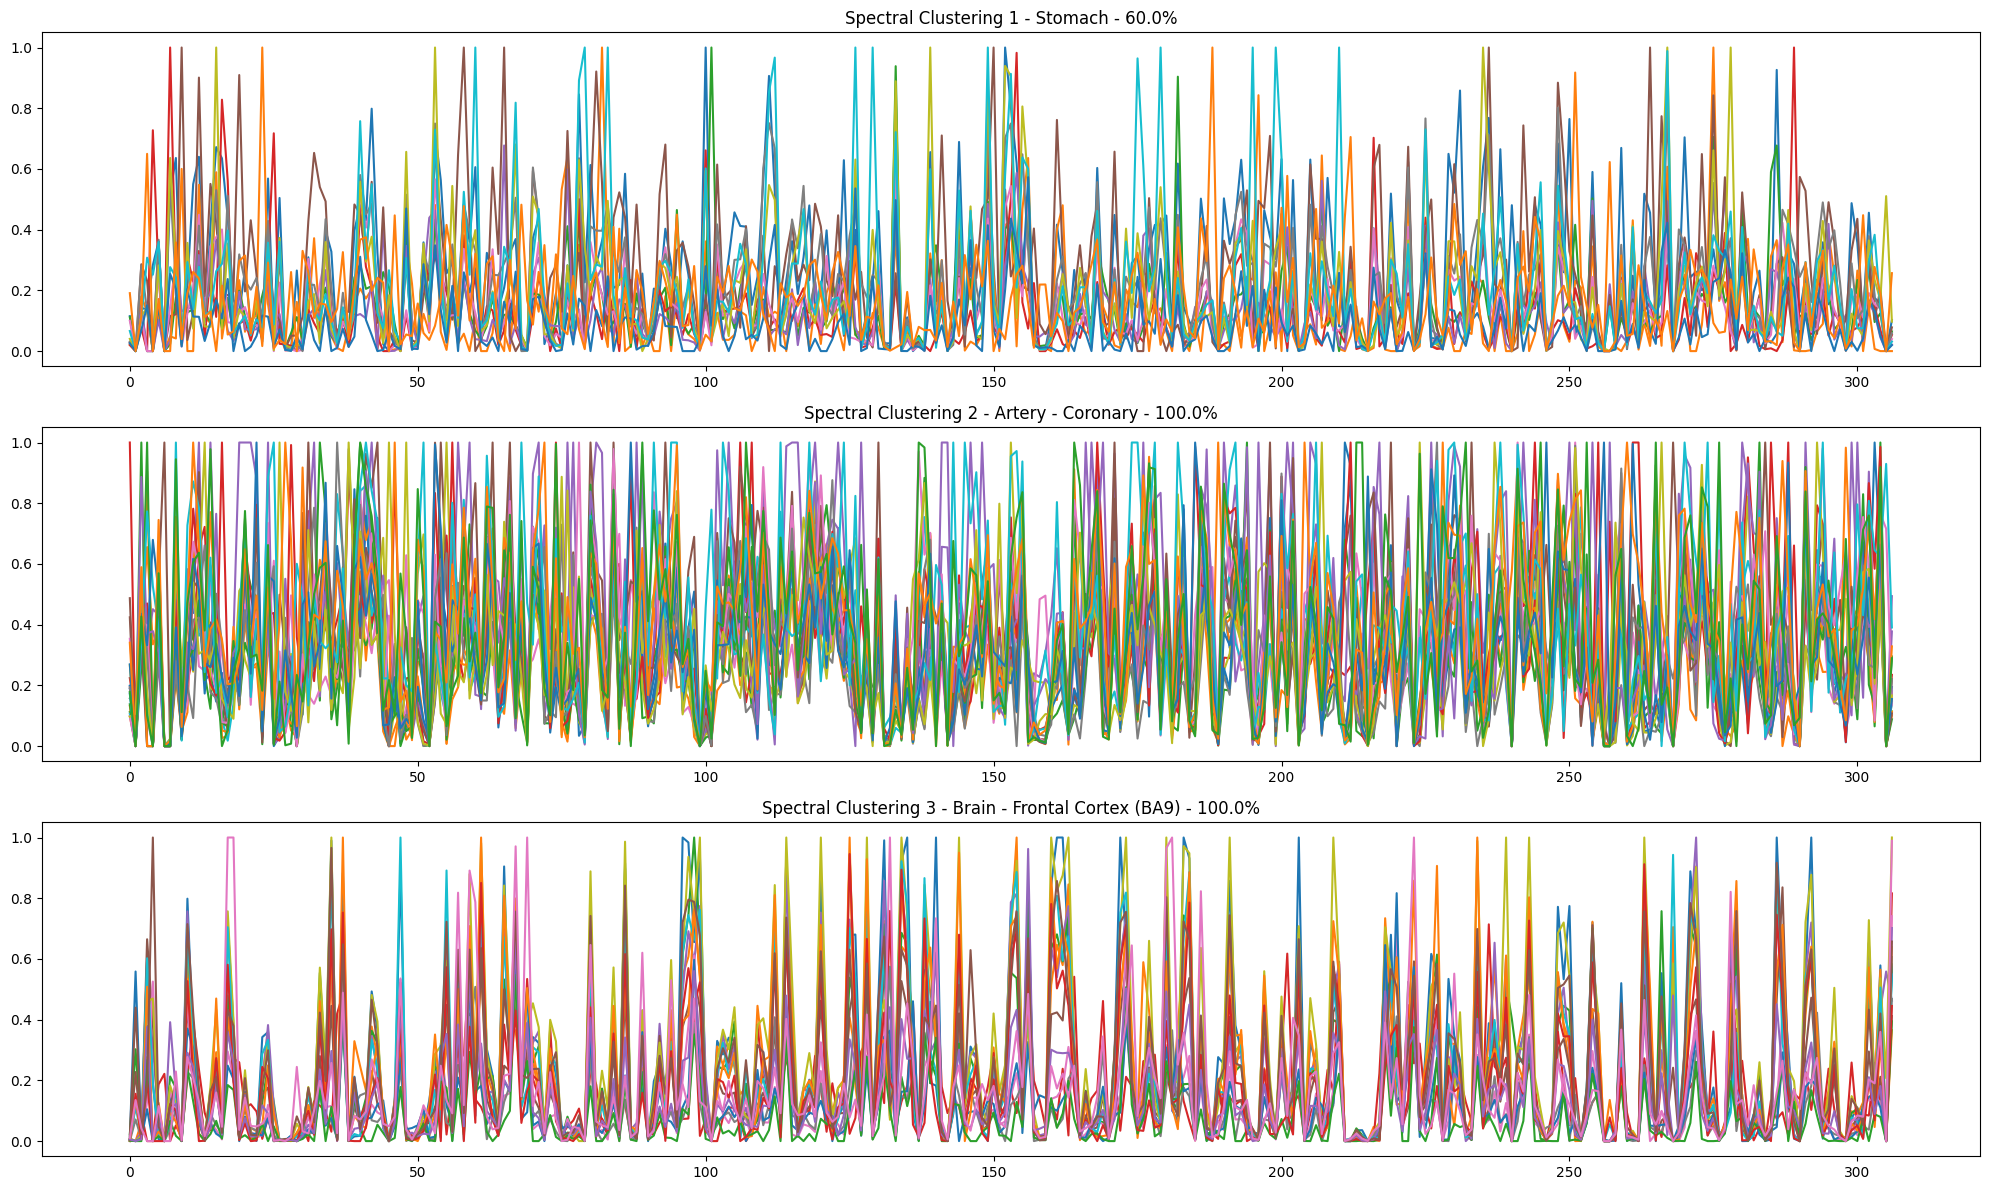

In [ ]:
n_clusters = 3
lb = ytreino.spectral_clustering
plt.figure(figsize=(20, 12))
for cluster_idx in range(n_clusters):
    plt.subplot(n_clusters, 1, cluster_idx + 1)
    for series_idx, label in enumerate(lb):
        if label == cluster_idx:
            plt.plot(xtreino.to_numpy()[series_idx].ravel())
    plt.title((f'Spectral Clustering {cluster_idx + 1} - {ytreino[lb == cluster_idx].Categories.value_counts().index[0]} - {round(ytreino[lb == cluster_idx].Categories.value_counts()[0]/(ytreino["Categories"] == ytreino[lb == cluster_idx].Categories.value_counts().index[0]).sum()*100, 2)}%'))
plt.tight_layout()
plt.show()

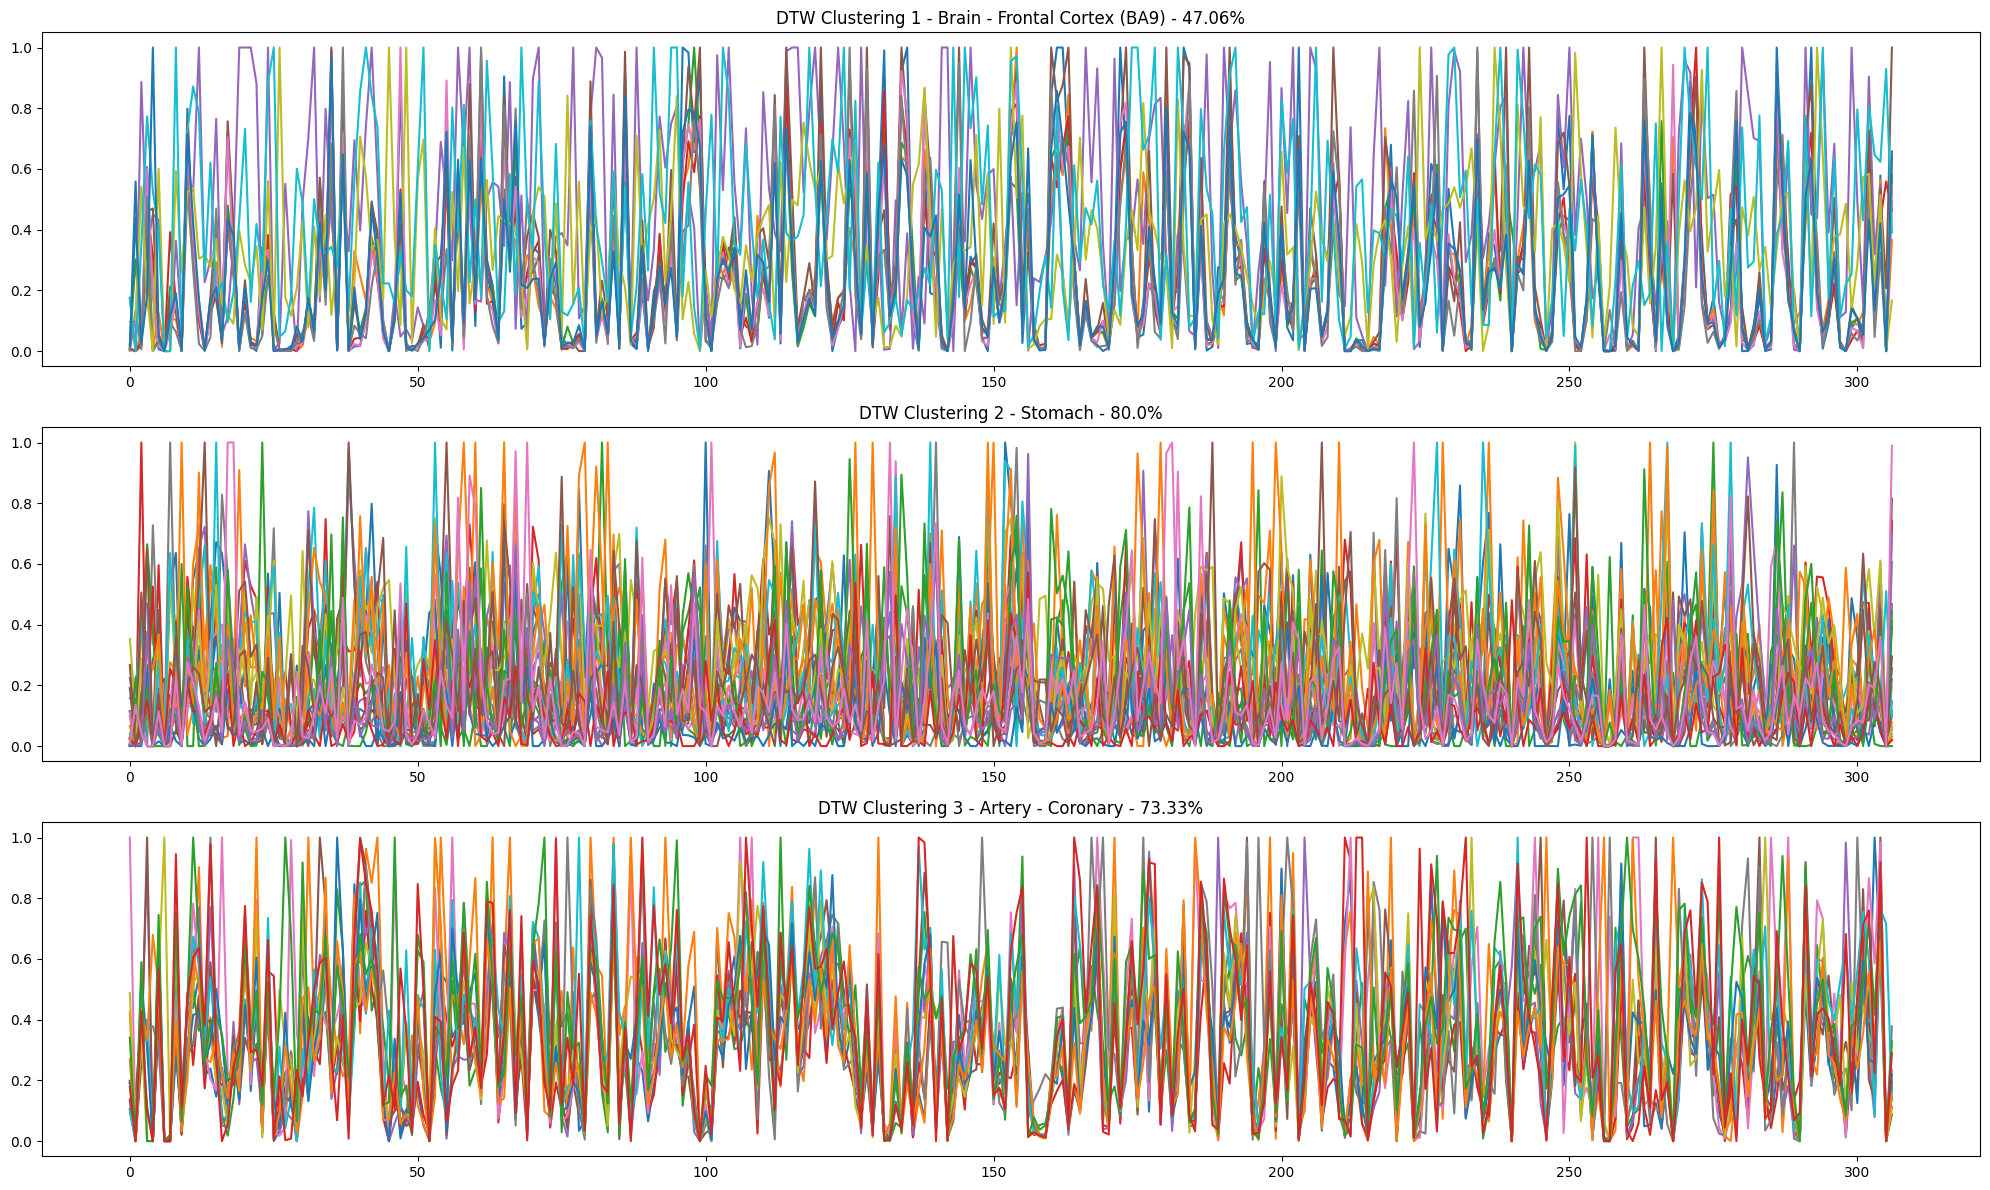

In [ ]:
n_clusters = 3
lb = ytreino.DTW
plt.figure(figsize=(20, 12))
for cluster_idx in range(n_clusters):
    plt.subplot(n_clusters, 1, cluster_idx + 1)
    for series_idx, label in enumerate(lb):
        if label == cluster_idx:
            plt.plot(xtreino.to_numpy()[series_idx].ravel())
    plt.title((f'DTW Clustering {cluster_idx + 1} - {ytreino[lb == cluster_idx].Categories.value_counts().index[0]} - {round(ytreino[lb == cluster_idx].Categories.value_counts()[0]/(ytreino["Categories"] == ytreino[lb == cluster_idx].Categories.value_counts().index[0]).sum()*100, 2)}%'))
plt.tight_layout()
plt.show()

12

'Brain - Frontal Cortex (BA9)'

17

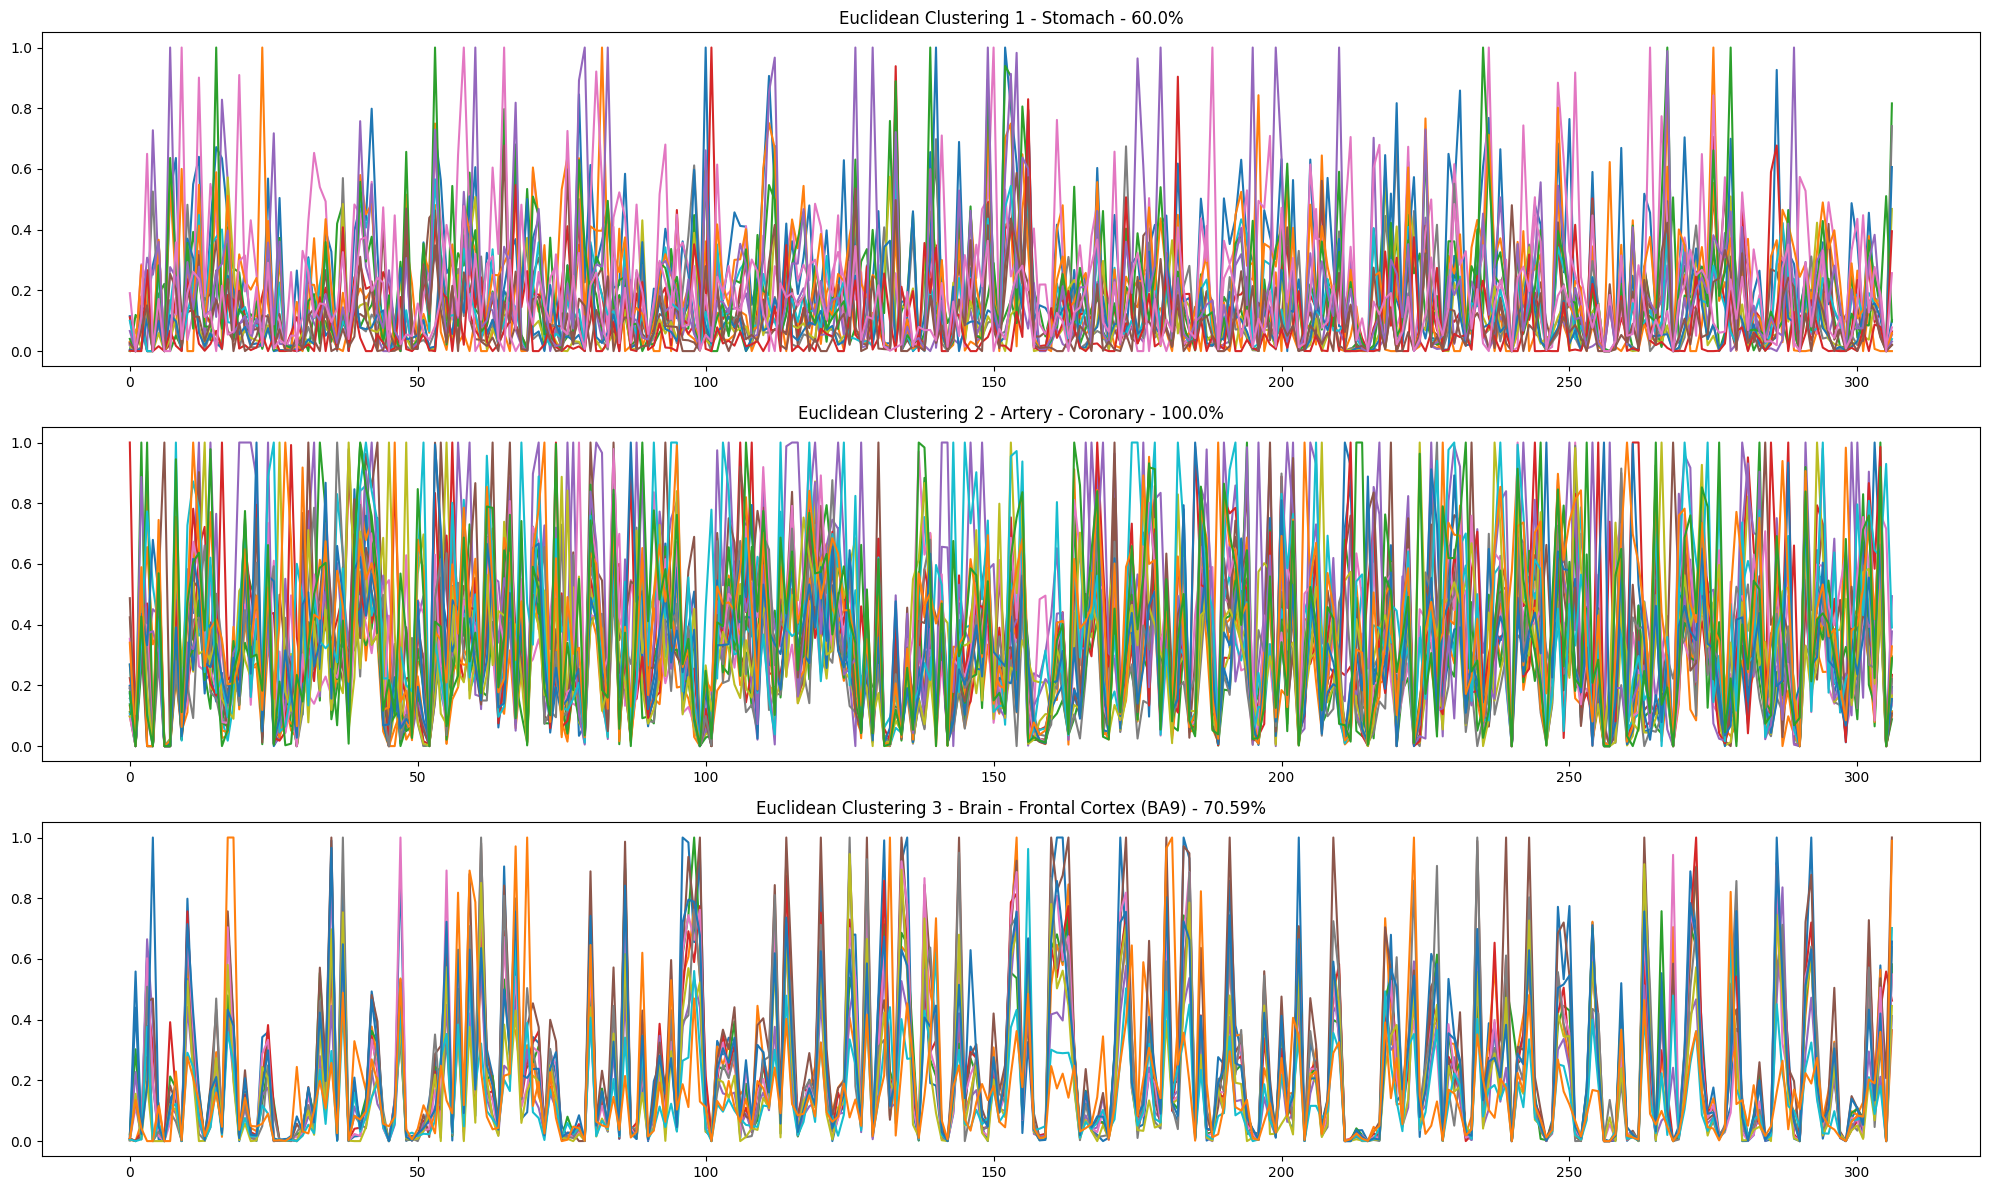

In [ ]:
n_clusters = 3
lb = ytreino.Euclidean
plt.figure(figsize=(20, 12))
for cluster_idx in range(n_clusters):
    plt.subplot(n_clusters, 1, cluster_idx + 1)
    for series_idx, label in enumerate(lb):
        if label == cluster_idx:
            plt.plot(xtreino.to_numpy()[series_idx].ravel())
    plt.title((f'Euclidean Clustering {cluster_idx + 1} - {ytreino[lb == cluster_idx].Categories.value_counts().index[0]} - {round(ytreino[lb == cluster_idx].Categories.value_counts()[0]/(ytreino["Categories"] == ytreino[lb == cluster_idx].Categories.value_counts().index[0]).sum()*100, 2)}%'))
plt.tight_layout()
plt.show()